## 단어사전 생성 및 불용어 제거, 빈도 수 확인하기

In [1]:
import numpy as np
import pandas as pd

In [2]:
# scraping한 엑셀파일 불러오기
df = pd.read_excel('result_210325_1637.xlsx', encoding='utf-8')
df.head()

,Title,Date,Article,URL,PressCompany
0,"'경쟁력'은 끝났다…오세훈 vs 안철수, 단일화 핵심은 '정권 교체'",2021.03.23. 오전 12:01,서울시장 보궐선거 야권 단일화를 위한 여론조사가 시작된 가운데 야권 정계개편 주도권...,https://news.naver.com/main/read.nhn?mode=LSD&...,더팩트
1,서울시장 野 단일 후보 오세훈 확정...4·7 재보선 대진표 확정,2021.03.23. 오후 12:12,"■ 진행 : 김정아 앵커 ■ 출연 : 김형준 / 명지대 교수, 배종호 / 세한대 교...",https://news.naver.com/main/read.nhn?mode=LSD&...,YTN
2,"'박영선표' 청년 공약…""국회를 청년과 시민 품으로""",2021.03.23. 오후 3:42,사진=연합뉴스 서울 영등포구 여의도동 1번지. 여의도 총 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,JTBC
3,"핵심은 '부동산 공급'…박 ""공공 주도"" vs 오 ""민간 재건축""",2021.03.24. 오전 7:54,"[앵커]서로에 대한 공격 포인트도 부동산이지만, 박영선·오세훈 두 후보가 경쟁하는 ...",https://news.naver.com/main/read.nhn?mode=LSD&...,JTBC
4,박영선-오세훈 누가 시장돼도 재개발-재건축 허용할 듯,2021.03.23. 오전 11:54,서울시 시장 후보로 격돌할 박영선-오세훈 후보 동아일보 DB 보름 앞으로 다가온 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,donga.com


In [3]:
articles = df['Article'].tolist()
articles = ''.join(articles)
articles[:1000]

"서울시장 보궐선거 야권 단일화를 위한 여론조사가 시작된 가운데 야권 정계개편 주도권이 관건이 될 것으로 전망된다. 지난 19일 후보자 등록을 마친 두 후보. /국회사진취재단야권 정계개편·정권교체에 관심…'초박빙'[더팩트｜국회=문혜현 기자] 서울시장 보궐선거 야권 단일화 여론조사가 22일 시작된 가운데 '정권 교체 적임자'가 관건이 될 것으로 전망된다.안철수 국민의당 후보, 오세훈 국민의힘 후보 모두 여론조사상 박영선 더불어민주당 후보를 큰 폭으로 앞선 상황에서 보궐선거 이후 대선 정국을 이끌어갈 후보와 조직에 관심이 몰릴 거란 분석이다.지난 21일 KBS·MBC·SBS 지상파 방송3사가 공동으로 3개 여론조사 기관(한국리서치·코리아리서치·입소스)에 의뢰해 지난 20일부터 이틀 동안 서울 지역 성인 남녀 1006명을 대상으로 실시한 범야권 단일화 관련 조사 결과, 오세훈 후보가 적합하다는 응답이 34.4%, 안철수 후보가 적합하다는 응답이 34.3%로 집계됐다. '적합한 후보가 없다'는 응답은 28.2%로 집계됐다.'민주당 박영선 후보와 대결에서 누가 더 경쟁력이 있다고 보냐'고 묻는 '경쟁력' 조사에서는 오세훈 후보가 39.0%, 안철수 후보가 37.3%로 마찬가지로 오차범위 내에서 접전을 벌이는 것으로 나타났다.또 두 후보 가운데 누구로 야권이 단일화하든 박영선 민주당 후보를 오차범위 밖에서 앞서는 것으로 나타났다.야권 단일후보로 오세훈 후보가 나올 경우, 오세훈 후보 47.0%, 박영선 후보 30.4%로 16.6% 포인트 차이였다. 안철수 후보가 단일 후보로 나올 경우 안철수 후보 45.9%, 박영선 후보 30.4%로 16%포인트 앞섰다. (응답률 36.6%, 표본오차는 95% 신뢰 수준에서 ±3.1%포인트. 휴대전화 가상번호(100%) 전화 면접 방식. 자세한 내용은 중앙선거여론조사심의위원회 홈페이지 참조.)이는 자연스럽게 정권 교체의 핵심 변수인 야권 통합 가능성으로 이어질 것으로 보인다. 안 후보와 오 후보 모두 자신이 중도까지 아우를 수 있는 적임

In [4]:
from konlpy.tag import Twitter

twitter = Twitter()
# norm-정규화, stem-어근화(품사별로 구분)
raw_pos_tagged = twitter.pos(articles, norm=True, stem=True)
raw_pos_tagged

C:\Users\by227\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('서울시장', 'Noun'),
 ('보궐선거', 'Noun'),
 ('야권', 'Noun'),
 ('단', 'Modifier'),
 ('일화', 'Noun'),
 ('를', 'Josa'),
 ('위', 'Noun'),
 ('한', 'Josa'),
 ('여론조사', 'Noun'),
 ('가', 'Josa'),
 ('시작', 'Noun'),
 ('되다', 'Verb'),
 ('가운데', 'Noun'),
 ('야권', 'Noun'),
 ('정계', 'Noun'),
 ('개편', 'Noun'),
 ('주도', 'Noun'),
 ('권', 'Suffix'),
 ('이', 'Josa'),
 ('관건', 'Noun'),
 ('이', 'Josa'),
 ('되다', 'Verb'),
 ('것', 'Noun'),
 ('으로', 'Josa'),
 ('전망', 'Noun'),
 ('되다', 'Verb'),
 ('.', 'Punctuation'),
 ('지난', 'Noun'),
 ('19일', 'Number'),
 ('후보자', 'Noun'),
 ('등록', 'Noun'),
 ('을', 'Josa'),
 ('마치다', 'Verb'),
 ('두', 'Noun'),
 ('후보', 'Noun'),
 ('.', 'Punctuation'),
 ('/', 'Punctuation'),
 ('국회', 'Noun'),
 ('사', 'Modifier'),
 ('진취', 'Noun'),
 ('재단', 'Noun'),
 ('야권', 'Noun'),
 ('정계', 'Noun'),
 ('개편', 'Noun'),
 ('·', 'Punctuation'),
 ('정권', 'Noun'),
 ('교체', 'Noun'),
 ('에', 'Josa'),
 ('관심', 'Noun'),
 ("…'", 'Punctuation'),
 ('초', 'Noun'),
 ('박빙', 'Noun'),
 ("'[", 'Punctuation'),
 ('더', 'Noun'),
 ('팩트', 'Noun'),
 ('｜', 'Foreign'),
 

In [5]:
# 불용어리스트 불러오기
df = pd.read_excel('dict_stopword.xlsx', encoding='utf-8')
del_list = df['stopwords'].tolist()
del_list

['후보',
 '공약',
 '서울',
 '선거',
 '정책',
 '시장',
 '서울시장',
 '사업',
 '서울시',
 '시민',
 '대한',
 '교수',
 '핵심',
 '대해',
 '기자',
 '때문',
 '뉴스',
 '생각',
 '계획',
 '위해',
 '제시',
 '정치',
 '지금',
 '관련',
 '우리',
 '통해',
 '대표',
 '신문',
 '투표',
 '금지',
 '배포',
 '무단',
 '이번',
 '센터',
 '의원',
 '이제',
 '말씀',
 '검증',
 '기사',
 '이야기',
 '오늘',
 '대변인',
 '정도',
 '약속',
 '하나',
 '시작',
 '기존',
 '전면',
 '라며',
 '사실',
 '구체',
 '경선',
 '그것',
 '조정',
 '실시',
 '다른',
 '모두',
 '지적',
 '토론',
 '자신',
 '유권자',
 '저작권',
 '입장',
 '주장',
 '유세',
 '기준',
 '부분',
 '이상',
 '마련',
 '경우',
 '비판',
 '판단',
 '대책',
 '연합뉴스',
 '내용',
 '위원회',
 '환경',
 '당선',
 '결과',
 '마지막',
 '지지',
 '국민',
 '제공',
 '협찬',
 '연한',
 '임기',
 '경향',
 '가지',
 '제기',
 '주요',
 '가장',
 '분야',
 '시대',
 '무엇',
 '의회',
 '직접',
 '위원',
 '방송',
 '호소',
 '로서',
 '방식',
 '이기',
 '가운데',
 '만큼',
 '일부',
 '막판',
 '일화',
 '한편',
 '역시',
 '그동안',
 '모든',
 '면서',
 '도시',
 '문제',
 '정부',
 '얘기',
 '사람',
 '앵커',
 '여론조사',
 '본인',
 '지역',
 '가능성',
 '실제',
 '평가',
 '이후',
 '지원',
 '한국',
 '국회',
 '이슈',
 '네이버',
 '지난',
 '모습',
 '계속',
 '최근',
 '여러',
 '발언',
 '단지',
 '수직',
 '출마',
 '후보자',
 '

In [6]:
# 불용어 제거
word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]:
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 불용어리스트 제외
            word_cleaned.append(word[0])
        
word_cleaned

['보궐선거',
 '정계',
 '개편',
 '주도',
 '관건',
 '전망',
 '진취',
 '재단',
 '정계',
 '개편',
 '교체',
 '박빙',
 '팩트',
 '혜현',
 '보궐선거',
 '교체',
 '적임',
 '관건',
 '전망',
 '안철수',
 '국민의당',
 '오세훈',
 '박영선',
 '민주당',
 '보궐선거',
 '정국',
 '조직',
 '거란',
 '지상파',
 '사가',
 '공동',
 '리서치',
 '코리아',
 '리서치',
 '소스',
 '의뢰',
 '이틀',
 '성인',
 '남녀',
 '조사',
 '오세훈',
 '응답',
 '안철수',
 '응답',
 '집계',
 '응답',
 '집계',
 '민주당',
 '박영선',
 '경쟁력',
 '경쟁력',
 '조사',
 '오세훈',
 '안철수',
 '마찬가지',
 '오차',
 '범위',
 '접전',
 '누구',
 '단일',
 '박영선',
 '민주당',
 '오차',
 '범위',
 '오세훈',
 '오세훈',
 '박영선',
 '포인트',
 '안철수',
 '단일',
 '안철수',
 '박영선',
 '포인트',
 '응답',
 '표본',
 '오차',
 '신뢰',
 '포인트',
 '휴대전화',
 '가상',
 '번호',
 '전화',
 '면접',
 '심의',
 '홈페이지',
 '참조',
 '자연',
 '교체',
 '변수인',
 '통합',
 '중도',
 '적임',
 '자임',
 '안철수',
 '국민의당',
 '교체',
 '남윤호',
 '최고',
 '지층',
 '확장',
 '교체',
 '통합',
 '교체',
 '각오',
 '의지',
 '단일',
 '화가',
 '윤석열',
 '김동연',
 '홍정욱',
 '금태섭',
 '정의',
 '로우',
 '합리',
 '중도우파',
 '인사',
 '삼고초려',
 '명실',
 '개혁',
 '우파',
 '플랫폼',
 '정계',
 '편의',
 '자처',
 '첫날',
 '각기',
 '행보',
 '지층',
 '확장',
 '강남',
 '방문',
 '전통',
 '지층',
 '강남',
 '타워',


In [7]:
# 단어 갯수 파악
word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 
    else:
        word_dic[word] += 1
        
word_dic

{'보궐선거': 183,
 '정계': 20,
 '개편': 12,
 '주도': 30,
 '관건': 17,
 '전망': 36,
 '진취': 4,
 '재단': 22,
 '교체': 22,
 '박빙': 10,
 '팩트': 18,
 '혜현': 2,
 '적임': 12,
 '안철수': 262,
 '국민의당': 87,
 '오세훈': 451,
 '박영선': 546,
 '민주당': 633,
 '정국': 4,
 '조직': 48,
 '거란': 6,
 '지상파': 2,
 '사가': 2,
 '공동': 38,
 '리서치': 10,
 '코리아': 4,
 '소스': 6,
 '의뢰': 6,
 '이틀': 14,
 '성인': 4,
 '남녀': 14,
 '조사': 48,
 '응답': 28,
 '집계': 8,
 '경쟁력': 74,
 '마찬가지': 12,
 '오차': 26,
 '범위': 22,
 '접전': 10,
 '누구': 33,
 '단일': 99,
 '포인트': 25,
 '표본': 8,
 '신뢰': 8,
 '휴대전화': 2,
 '가상': 6,
 '번호': 4,
 '전화': 24,
 '면접': 4,
 '심의': 9,
 '홈페이지': 10,
 '참조': 2,
 '자연': 14,
 '변수인': 2,
 '통합': 14,
 '중도': 95,
 '자임': 2,
 '남윤호': 4,
 '최고': 12,
 '지층': 62,
 '확장': 18,
 '각오': 14,
 '의지': 22,
 '화가': 42,
 '윤석열': 56,
 '김동연': 4,
 '홍정욱': 2,
 '금태섭': 40,
 '정의': 12,
 '로우': 2,
 '합리': 3,
 '중도우파': 2,
 '인사': 51,
 '삼고초려': 4,
 '명실': 2,
 '개혁': 28,
 '우파': 4,
 '플랫폼': 4,
 '편의': 6,
 '자처': 4,
 '첫날': 4,
 '각기': 2,
 '행보': 42,
 '강남': 50,
 '방문': 32,
 '전통': 18,
 '타워': 2,
 '청년': 70,
 '스타트업': 8,
 '관계자': 38,
 '간담': 18

In [8]:
# 갯수 파악한 dict를 value값 기준으로 내림차순 정렬
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('민주당', 633),
 ('박영선', 546),
 ('오세훈', 451),
 ('부동산', 307),
 ('안철수', 262),
 ('김진애', 249),
 ('주택', 227),
 ('공급', 212),
 ('경제', 188),
 ('여성', 188),
 ('보궐선거', 183),
 ('의혹', 175),
 ('개발', 173),
 ('부산', 148),
 ('아파트', 143),
 ('코로나', 133),
 ('위원장', 126),
 ('재건축', 126),
 ('박원순', 125),
 ('장관', 125),
 ('문재인', 121),
 ('김종대', 104),
 ('박형준', 102),
 ('승리', 100),
 ('단일', 99),
 ('정당', 96),
 ('중도', 95),
 ('여당', 90),
 ('구독', 90),
 ('재개발', 90),
 ('전환', 90),
 ('국민의당', 87),
 ('투기', 87),
 ('부산시', 84),
 ('사퇴', 83),
 ('시티', 80),
 ('여야', 79),
 ('결정', 79),
 ('보수', 77),
 ('공인', 77),
 ('재난', 75),
 ('경쟁력', 74),
 ('여의도', 74),
 ('공격', 72),
 ('인권', 72),
 ('권성동', 72),
 ('청년', 70),
 ('정청래', 70),
 ('미래', 69),
 ('총장', 66),
 ('토지', 66),
 ('내곡동', 63),
 ('소상', 63),
 ('지층', 62),
 ('효과', 62),
 ('중소', 62),
 ('벤처기업', 62),
 ('김종인', 61),
 ('이재명', 60),
 ('측면', 60),
 ('확정', 59),
 ('보도', 58),
 ('집값', 58),
 ('정원', 58),
 ('일자리', 58),
 ('신도시', 58),
 ('박찬형', 58),
 ('지급', 57),
 ('윤석열', 56),
 ('여권', 56),
 ('민간', 56),
 ('원금', 56),
 ('조금',

In [9]:
# 상위 100개 파악
for word, count in sorted_word_dic[:100]:
    print("{0}({1})".format(word, count), end=" ")

민주당(633) 박영선(546) 오세훈(451) 부동산(307) 안철수(262) 김진애(249) 주택(227) 공급(212) 경제(188) 여성(188) 보궐선거(183) 의혹(175) 개발(173) 부산(148) 아파트(143) 코로나(133) 위원장(126) 재건축(126) 박원순(125) 장관(125) 문재인(121) 김종대(104) 박형준(102) 승리(100) 단일(99) 정당(96) 중도(95) 여당(90) 구독(90) 재개발(90) 전환(90) 국민의당(87) 투기(87) 부산시(84) 사퇴(83) 시티(80) 여야(79) 결정(79) 보수(77) 공인(77) 재난(75) 경쟁력(74) 여의도(74) 공격(72) 인권(72) 권성동(72) 청년(70) 정청래(70) 미래(69) 총장(66) 토지(66) 내곡동(63) 소상(63) 지층(62) 효과(62) 중소(62) 벤처기업(62) 김종인(61) 이재명(60) 측면(60) 확정(59) 보도(58) 집값(58) 정원(58) 일자리(58) 신도시(58) 박찬형(58) 지급(57) 윤석열(56) 여권(56) 민간(56) 원금(56) 조금(55) 야당(55) 국가(55) 포함(54) 이명박(54) 이동형(54) 한번(53) 과연(53) 그때(53) 지정(53) 이자(52) 문화(52) 인사(51) 강남(50) 현실(50) 오히려(50) 해명(50) 특혜(50) 일보(50) 직원(50) 평등(50) 정치인(49) 조직(48) 조사(48) 언급(48) 준비(48) 자체(48) 임대(48) 

In [10]:
# 정렬된 단어 및 빈도수 엑셀파일에 저장.
# 세대별 키워드 빈도수 비교시 이용
s_38_mayor_df = pd.DataFrame(sorted_word_dic[:100])

s_38_mayor_df.to_excel('result_38.xlsx', index=False, encoding='utf-8')
s_38_mayor_df.columns=['word','count']

## WordCloud 생성

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# 워드클라우드 생성
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                       max_words=100, width=1600, height=1000, 
                       background_color='white').generate_from_frequencies(word_dic)

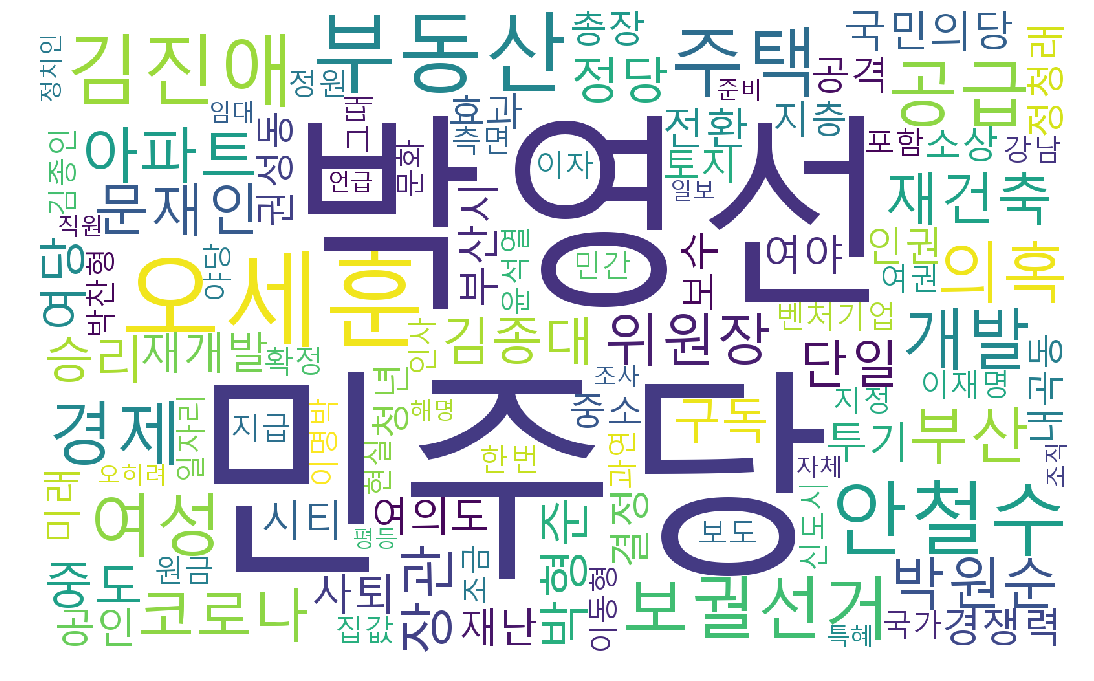

In [13]:
plt.figure(figsize=(15,15)) 
plt.imshow(word_cloud) 
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## WordCloud Masking

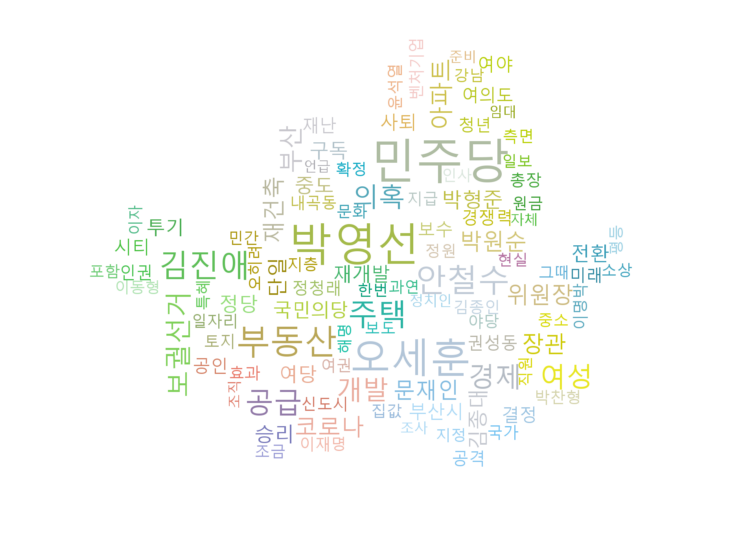

In [14]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

seoul_masking = np.array(Image.open("img/seoul_map.jpg"))
image_colors = ImageColorGenerator(seoul_masking)

# 워드클라우드 생성(최대 100단어)
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                       max_words=100, max_font_size=120, width=1600, height=1000, 
                       mask=seoul_masking, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(10,10))
# 이미지에 맞게 색상입히기
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') 
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 이미지파일 생성
word_cloud.to_file("seoul_mayor.png")